Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


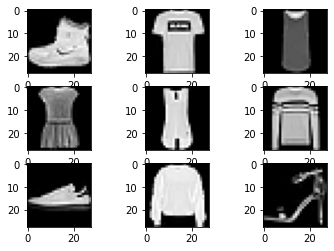

In [71]:
import numpy as np
from matplotlib import pyplot
from keras.datasets import fashion_mnist
import random
import tensorflow as tf

# set random seeds
np.random.seed(5)
random.seed(10)
tf.random.set_seed(2)

# load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# normalize dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# plot first few images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [46]:
class Fashion_MNIST:
  def __init__(self, learning_rate, optimizer, epoch, batch, hidden_size, val_size):
    self.learning_rate = learning_rate
    self.optimizer = optimizer
    self.epoch = epoch
    self.batch = batch
    self.hidden_size = hidden_size
    self.val_size = val_size

  def define_model(self):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten()) # data format is channels_last 
    model.add(tf.keras.layers.Dense(self.hidden_size, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    if (self.optimizer == 'sgd'):
      opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    elif self.optimizer == 'Adam':
      opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
      print("using Adam optimizer")

    elif self.optimizer == 'RMSProp':
      opt = tf.keras.optimizers.RMSprop(learning_rate=self.learning_rate)
      print("using RMSProp optimizer")

    else: 
      opt = tf.keras.optimizers.Adagrad(learning_rate=self.learning_rate)
      print("using Adagrad optimizer")


    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

  def train_model(self, model):
    history = model.fit(x_train,
                        y_train,
                        batch_size=self.batch,
                        epochs=self.epoch,
                        validation_split=self.val_size)
    return history

  def test_model(self, model):
    score = model.evaluate(x_test, y_test)


In [34]:
class1 = Fashion_MNIST(0.001, 'sgd', 50, 64, 16, 0.1)
model1 = class1.define_model()
print("training the model")
class1.train_model(model1)
print("testing the model")
class1.test_model(model1)

training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 2.0197 - accuracy: 0.2739 - val_loss: 1.7752 - val_accuracy: 0.4567
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 1.6291 - accuracy: 0.5461 - val_loss: 1.4606 - val_accuracy: 0.6150
Epoch 3/50
844/844 [==============================] - 1s 1ms/step - loss: 1.3472 - accuracy: 0.6246 - val_loss: 1.2145 - val_accuracy: 0.6470
Epoch 4/50
844/844 [==============================] - 1s 2ms/step - loss: 1.1458 - accuracy: 0.6454 - val_loss: 1.0567 - val_accuracy: 0.6565
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 1.0217 - accuracy: 0.6610 - val_loss: 0.9597 - val_accuracy: 0.6717
Epoch 6/50
844/844 [==============================] - 1s 2ms/step - loss: 0.9432 - accuracy: 0.6768 - val_loss: 0.8963 - val_accuracy: 0.6883
Epoch 7/50
844/844 [==============================] - 1s 2ms/step - loss: 0.8888 - accuracy: 0.6909 - val_loss: 0.8497 - val_accu

In [35]:
class2 = Fashion_MNIST(0.001, 'sgd', 50, 64, 32, 0.1)
model2 = class2.define_model()
print("training the model")
class2.train_model(model2)
print("testing the model")
class2.test_model(model2)

training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.9143 - accuracy: 0.4387 - val_loss: 1.5394 - val_accuracy: 0.6180
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 1.3384 - accuracy: 0.6452 - val_loss: 1.1593 - val_accuracy: 0.6757
Epoch 3/50
844/844 [==============================] - 1s 1ms/step - loss: 1.0715 - accuracy: 0.6813 - val_loss: 0.9759 - val_accuracy: 0.7043
Epoch 4/50
844/844 [==============================] - 1s 2ms/step - loss: 0.9359 - accuracy: 0.7055 - val_loss: 0.8752 - val_accuracy: 0.7205
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 0.8565 - accuracy: 0.7223 - val_loss: 0.8121 - val_accuracy: 0.7368
Epoch 6/50
844/844 [==============================] - 1s 2ms/step - loss: 0.8038 - accuracy: 0.7371 - val_loss: 0.7691 - val_accuracy: 0.7462
Epoch 7/50
844/844 [==============================] - 1s 2ms/step - loss: 0.7653 - accuracy: 0.7476 - val_loss: 0.7352 - val_accu

In [36]:
class3 = Fashion_MNIST(0.001, 'sgd', 50, 64, 64, 0.1)
model3 = class3.define_model()
print("training the model")
class3.train_model(model3)
print("testing the model")
class3.test_model(model3)

training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.7912 - accuracy: 0.4562 - val_loss: 1.3823 - val_accuracy: 0.6513
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 1.2019 - accuracy: 0.6568 - val_loss: 1.0400 - val_accuracy: 0.6875
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.9786 - accuracy: 0.6879 - val_loss: 0.8967 - val_accuracy: 0.7117
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.8734 - accuracy: 0.7129 - val_loss: 0.8200 - val_accuracy: 0.7297
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.8110 - accuracy: 0.7299 - val_loss: 0.7697 - val_accuracy: 0.7455
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.7676 - accuracy: 0.7438 - val_loss: 0.7338 - val_accuracy: 0.7528
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.7348 - accuracy: 0.7533 - val_loss: 0.7047 - val_accu

In [37]:
class4 = Fashion_MNIST(0.001, 'sgd', 50, 64, 128, 0.1)
model4 = class4.define_model()
print("training the model")
class4.train_model(model4)
print("testing the model")
class4.test_model(model4)

training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.7788 - accuracy: 0.4595 - val_loss: 1.3608 - val_accuracy: 0.6457
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 1.1894 - accuracy: 0.6584 - val_loss: 1.0430 - val_accuracy: 0.6855
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.9791 - accuracy: 0.6937 - val_loss: 0.9039 - val_accuracy: 0.7112
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.8735 - accuracy: 0.7212 - val_loss: 0.8241 - val_accuracy: 0.7325
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.8073 - accuracy: 0.7423 - val_loss: 0.7700 - val_accuracy: 0.7545
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.7603 - accuracy: 0.7581 - val_loss: 0.7309 - val_accuracy: 0.7612
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.7243 - accuracy: 0.7690 - val_loss: 0.6992 - val_accu

In [38]:
# testing with different percentages of validation set
# val_size = 0.15, hidden_size = 16
class5 = Fashion_MNIST(0.001, 'sgd', 50, 64, 16, 0.15)
model5 = class5.define_model()
print("training the model")
class5.train_model(model5)
print("testing the model")
class5.test_model(model5)

training the model
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 1.9730 - accuracy: 0.3063 - val_loss: 1.7132 - val_accuracy: 0.4369
Epoch 2/50
797/797 [==============================] - 1s 2ms/step - loss: 1.5598 - accuracy: 0.5462 - val_loss: 1.4116 - val_accuracy: 0.6259
Epoch 3/50
797/797 [==============================] - 1s 2ms/step - loss: 1.3128 - accuracy: 0.6498 - val_loss: 1.2067 - val_accuracy: 0.6740
Epoch 4/50
797/797 [==============================] - 1s 2ms/step - loss: 1.1419 - accuracy: 0.6744 - val_loss: 1.0633 - val_accuracy: 0.6902
Epoch 5/50
797/797 [==============================] - 1s 2ms/step - loss: 1.0227 - accuracy: 0.6868 - val_loss: 0.9644 - val_accuracy: 0.6950
Epoch 6/50
797/797 [==============================] - 1s 2ms/step - loss: 0.9399 - accuracy: 0.6964 - val_loss: 0.8952 - val_accuracy: 0.7076
Epoch 7/50
797/797 [==============================] - 1s 2ms/step - loss: 0.8808 - accuracy: 0.7061 - val_loss: 0.8444 - val_accu

In [51]:
# val_size = 0.15, hidden_size = 32
class6 = Fashion_MNIST(0.001, 'sgd', 50, 64, 32, 0.15)
model6 = class6.define_model()
print("training the model")
class6.train_model(model6)
print("testing the model")
class6.test_model(model6)

training the model
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 1.9748 - accuracy: 0.3895 - val_loss: 1.6704 - val_accuracy: 0.5502
Epoch 2/50
797/797 [==============================] - 1s 2ms/step - loss: 1.4759 - accuracy: 0.5835 - val_loss: 1.2982 - val_accuracy: 0.6439
Epoch 3/50
797/797 [==============================] - 1s 2ms/step - loss: 1.1972 - accuracy: 0.6573 - val_loss: 1.0950 - val_accuracy: 0.6820
Epoch 4/50
797/797 [==============================] - 1s 2ms/step - loss: 1.0404 - accuracy: 0.6830 - val_loss: 0.9739 - val_accuracy: 0.7006
Epoch 5/50
797/797 [==============================] - 1s 2ms/step - loss: 0.9418 - accuracy: 0.6995 - val_loss: 0.8953 - val_accuracy: 0.7127
Epoch 6/50
797/797 [==============================] - 1s 1ms/step - loss: 0.8754 - accuracy: 0.7146 - val_loss: 0.8396 - val_accuracy: 0.7290
Epoch 7/50
797/797 [==============================] - 1s 2ms/step - loss: 0.8266 - accuracy: 0.7278 - val_loss: 0.7973 - val_accu

In [52]:
# val_size = 0.15, hidden_size = 64
class7 = Fashion_MNIST(0.001, 'sgd', 50, 64, 64, 0.15)
model7 = class7.define_model()
print("training the model")
class7.train_model(model7)
print("testing the model")
class7.test_model(model7)

training the model
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 1.8097 - accuracy: 0.4671 - val_loss: 1.4590 - val_accuracy: 0.6304
Epoch 2/50
797/797 [==============================] - 2s 2ms/step - loss: 1.2833 - accuracy: 0.6447 - val_loss: 1.1308 - val_accuracy: 0.6696
Epoch 3/50
797/797 [==============================] - 2s 2ms/step - loss: 1.0551 - accuracy: 0.6745 - val_loss: 0.9727 - val_accuracy: 0.6934
Epoch 4/50
797/797 [==============================] - 2s 2ms/step - loss: 0.9335 - accuracy: 0.7020 - val_loss: 0.8791 - val_accuracy: 0.7184
Epoch 5/50
797/797 [==============================] - 2s 2ms/step - loss: 0.8564 - accuracy: 0.7240 - val_loss: 0.8179 - val_accuracy: 0.7352
Epoch 6/50
797/797 [==============================] - 2s 2ms/step - loss: 0.8035 - accuracy: 0.7389 - val_loss: 0.7735 - val_accuracy: 0.7494
Epoch 7/50
797/797 [==============================] - 2s 2ms/step - loss: 0.7640 - accuracy: 0.7506 - val_loss: 0.7396 - val_accu

In [53]:
# val_size = 0.15, hidden_size = 128
class8 = Fashion_MNIST(0.001, 'sgd', 50, 64, 128, 0.15)
model8 = class8.define_model()
print("training the model")
class8.train_model(model8)
print("testing the model")
class8.test_model(model8)

training the model
Epoch 1/50
797/797 [==============================] - 2s 3ms/step - loss: 1.7085 - accuracy: 0.5161 - val_loss: 1.3294 - val_accuracy: 0.6620
Epoch 2/50
797/797 [==============================] - 2s 3ms/step - loss: 1.1675 - accuracy: 0.6707 - val_loss: 1.0288 - val_accuracy: 0.7000
Epoch 3/50
797/797 [==============================] - 2s 3ms/step - loss: 0.9646 - accuracy: 0.7074 - val_loss: 0.8932 - val_accuracy: 0.7241
Epoch 4/50
797/797 [==============================] - 2s 3ms/step - loss: 0.8618 - accuracy: 0.7322 - val_loss: 0.8161 - val_accuracy: 0.7411
Epoch 5/50
797/797 [==============================] - 2s 3ms/step - loss: 0.7981 - accuracy: 0.7489 - val_loss: 0.7649 - val_accuracy: 0.7527
Epoch 6/50
797/797 [==============================] - 2s 3ms/step - loss: 0.7536 - accuracy: 0.7614 - val_loss: 0.7276 - val_accuracy: 0.7657
Epoch 7/50
797/797 [==============================] - 2s 2ms/step - loss: 0.7197 - accuracy: 0.7702 - val_loss: 0.6980 - val_accu

In [54]:
# val_size = 0.2, hidden_size = 16
class9 = Fashion_MNIST(0.001, 'sgd', 50, 64, 16, 0.2)
model9 = class9.define_model()
print("training the model")
class9.train_model(model9)
print("testing the model")
class9.test_model(model9)

training the model
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.1430 - accuracy: 0.1960 - val_loss: 1.9919 - val_accuracy: 0.3119
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 1.8210 - accuracy: 0.4424 - val_loss: 1.6326 - val_accuracy: 0.5860
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 1.4790 - accuracy: 0.6285 - val_loss: 1.3187 - val_accuracy: 0.6546
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 1.2265 - accuracy: 0.6564 - val_loss: 1.1207 - val_accuracy: 0.6712
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 1.0729 - accuracy: 0.6727 - val_loss: 1.0011 - val_accuracy: 0.6888
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.9758 - accuracy: 0.6887 - val_loss: 0.9225 - val_accuracy: 0.7047
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.9087 - accuracy: 0.7042 - val_loss: 0.8665 - val_accu

In [55]:
# val_size = 0.2, hidden_size = 32
class10 = Fashion_MNIST(0.001, 'sgd', 50, 64, 32, 0.2)
model10 = class10.define_model()
print("training the model")
class10.train_model(model10)
print("testing the model")
class10.test_model(model10)

training the model
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.9022 - accuracy: 0.4082 - val_loss: 1.5654 - val_accuracy: 0.5972
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 1.3665 - accuracy: 0.6378 - val_loss: 1.1863 - val_accuracy: 0.6662
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 1.0923 - accuracy: 0.6776 - val_loss: 0.9995 - val_accuracy: 0.6939
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.9564 - accuracy: 0.6993 - val_loss: 0.9005 - val_accuracy: 0.7056
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.8769 - accuracy: 0.7175 - val_loss: 0.8366 - val_accuracy: 0.7269
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.8228 - accuracy: 0.7342 - val_loss: 0.7918 - val_accuracy: 0.7424
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7832 - accuracy: 0.7473 - val_loss: 0.7582 - val_accu

In [56]:
# val_size = 0.2, hidden_size = 64
class11 = Fashion_MNIST(0.001, 'sgd', 50, 64, 64, 0.2)
model11 = class11.define_model()
print("training the model")
class11.train_model(model11)
print("testing the model")
class11.test_model(model11)

training the model
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7850 - accuracy: 0.4184 - val_loss: 1.4289 - val_accuracy: 0.6079
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 1.2615 - accuracy: 0.6354 - val_loss: 1.1250 - val_accuracy: 0.6605
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 1.0536 - accuracy: 0.6673 - val_loss: 0.9795 - val_accuracy: 0.6837
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9429 - accuracy: 0.6885 - val_loss: 0.8937 - val_accuracy: 0.7026
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8725 - accuracy: 0.7072 - val_loss: 0.8356 - val_accuracy: 0.7190
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.8224 - accuracy: 0.7241 - val_loss: 0.7926 - val_accuracy: 0.7355
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7842 - accuracy: 0.7389 - val_loss: 0.7597 - val_accu

In [57]:
# val_size = 0.2, hidden_size = 128
class12 = Fashion_MNIST(0.001, 'sgd', 50, 64, 128, 0.2)
model12 = class12.define_model()
print("training the model")
class12.train_model(model12)
print("testing the model")
class12.test_model(model12)

training the model
Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.7114 - accuracy: 0.4929 - val_loss: 1.3517 - val_accuracy: 0.6452
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 1.1960 - accuracy: 0.6639 - val_loss: 1.0656 - val_accuracy: 0.6883
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9990 - accuracy: 0.6949 - val_loss: 0.9293 - val_accuracy: 0.7132
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8942 - accuracy: 0.7180 - val_loss: 0.8490 - val_accuracy: 0.7312
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8275 - accuracy: 0.7364 - val_loss: 0.7940 - val_accuracy: 0.7443
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7798 - accuracy: 0.7501 - val_loss: 0.7531 - val_accuracy: 0.7562
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7430 - accuracy: 0.7603 - val_loss: 0.7214 - val_accu

In [58]:
# val_size = 0.25, hidden_size = 16
class13 = Fashion_MNIST(0.001, 'sgd', 50, 64, 16, 0.25)
model13 = class13.define_model()
print("training the model")
class13.train_model(model13)
print("testing the model")
class13.test_model(model13)

training the model
Epoch 1/50
704/704 [==============================] - 2s 2ms/step - loss: 2.1126 - accuracy: 0.2782 - val_loss: 1.8964 - val_accuracy: 0.3875
Epoch 2/50
704/704 [==============================] - 1s 2ms/step - loss: 1.6935 - accuracy: 0.4678 - val_loss: 1.4999 - val_accuracy: 0.5615
Epoch 3/50
704/704 [==============================] - 1s 2ms/step - loss: 1.3623 - accuracy: 0.6128 - val_loss: 1.2360 - val_accuracy: 0.6491
Epoch 4/50
704/704 [==============================] - 1s 2ms/step - loss: 1.1591 - accuracy: 0.6534 - val_loss: 1.0811 - val_accuracy: 0.6657
Epoch 5/50
704/704 [==============================] - 1s 2ms/step - loss: 1.0346 - accuracy: 0.6710 - val_loss: 0.9833 - val_accuracy: 0.6783
Epoch 6/50
704/704 [==============================] - 1s 2ms/step - loss: 0.9546 - accuracy: 0.6855 - val_loss: 0.9180 - val_accuracy: 0.6925
Epoch 7/50
704/704 [==============================] - 1s 2ms/step - loss: 0.8980 - accuracy: 0.6990 - val_loss: 0.8707 - val_accu

In [59]:
# val_size = 0.2, hidden_size = 32
class14 = Fashion_MNIST(0.001, 'sgd', 50, 64, 32, 0.25)
model14 = class14.define_model()
print("training the model")
class14.train_model(model14)
print("testing the model")
class14.test_model(model14)

training the model
Epoch 1/50
704/704 [==============================] - 2s 2ms/step - loss: 1.9050 - accuracy: 0.3866 - val_loss: 1.5667 - val_accuracy: 0.5766
Epoch 2/50
704/704 [==============================] - 1s 2ms/step - loss: 1.3870 - accuracy: 0.6146 - val_loss: 1.2371 - val_accuracy: 0.6389
Epoch 3/50
704/704 [==============================] - 1s 2ms/step - loss: 1.1438 - accuracy: 0.6512 - val_loss: 1.0590 - val_accuracy: 0.6621
Epoch 4/50
704/704 [==============================] - 1s 2ms/step - loss: 1.0094 - accuracy: 0.6702 - val_loss: 0.9580 - val_accuracy: 0.6810
Epoch 5/50
704/704 [==============================] - 1s 2ms/step - loss: 0.9277 - accuracy: 0.6875 - val_loss: 0.8921 - val_accuracy: 0.6964
Epoch 6/50
704/704 [==============================] - 1s 2ms/step - loss: 0.8712 - accuracy: 0.7018 - val_loss: 0.8444 - val_accuracy: 0.7103
Epoch 7/50
704/704 [==============================] - 1s 2ms/step - loss: 0.8285 - accuracy: 0.7157 - val_loss: 0.8081 - val_accu

In [60]:
# val_size = 0.2, hidden_size = 64
class15 = Fashion_MNIST(0.001, 'sgd', 50, 64, 64, 0.25)
model15 = class15.define_model()
print("training the model")
class15.train_model(model15)
print("testing the model")
class15.test_model(model15)

training the model
Epoch 1/50
704/704 [==============================] - 2s 2ms/step - loss: 1.7367 - accuracy: 0.4684 - val_loss: 1.3954 - val_accuracy: 0.6253
Epoch 2/50
704/704 [==============================] - 2s 2ms/step - loss: 1.2508 - accuracy: 0.6444 - val_loss: 1.1236 - val_accuracy: 0.6646
Epoch 3/50
704/704 [==============================] - 1s 2ms/step - loss: 1.0569 - accuracy: 0.6672 - val_loss: 0.9837 - val_accuracy: 0.6787
Epoch 4/50
704/704 [==============================] - 1s 2ms/step - loss: 0.9477 - accuracy: 0.6842 - val_loss: 0.8993 - val_accuracy: 0.6975
Epoch 5/50
704/704 [==============================] - 1s 2ms/step - loss: 0.8778 - accuracy: 0.7036 - val_loss: 0.8430 - val_accuracy: 0.7129
Epoch 6/50
704/704 [==============================] - 2s 2ms/step - loss: 0.8287 - accuracy: 0.7210 - val_loss: 0.8017 - val_accuracy: 0.7299
Epoch 7/50
704/704 [==============================] - 2s 2ms/step - loss: 0.7911 - accuracy: 0.7349 - val_loss: 0.7698 - val_accu

In [63]:
# val_size = 0.2, hidden_size = 128
class16 = Fashion_MNIST(0.001, 'sgd', 50, 64, 128, 0.25)
model16 = class16.define_model()
print("training the model")
class16.train_model(model16)
print("testing the model")
class16.test_model(model16)

training the model
Epoch 1/50
704/704 [==============================] - 2s 3ms/step - loss: 1.7826 - accuracy: 0.4596 - val_loss: 1.4118 - val_accuracy: 0.6165
Epoch 2/50
704/704 [==============================] - 2s 3ms/step - loss: 1.2393 - accuracy: 0.6477 - val_loss: 1.1021 - val_accuracy: 0.6673
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 1.0281 - accuracy: 0.6833 - val_loss: 0.9570 - val_accuracy: 0.6971
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 0.9170 - accuracy: 0.7086 - val_loss: 0.8718 - val_accuracy: 0.7203
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 0.8473 - accuracy: 0.7288 - val_loss: 0.8152 - val_accuracy: 0.7359
Epoch 6/50
704/704 [==============================] - 2s 3ms/step - loss: 0.7985 - accuracy: 0.7449 - val_loss: 0.7739 - val_accuracy: 0.7511
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 0.7613 - accuracy: 0.7560 - val_loss: 0.7422 - val_accu

In [64]:
class17 = Fashion_MNIST(0.001, 'Adam', 50, 64, 128, 0.10)
model17 = class17.define_model()
print("training the model")
h = class17.train_model(model17)
print("testing the model")
class17.test_model(model17)

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 0.5285 - accuracy: 0.8149 - val_loss: 0.4166 - val_accuracy: 0.8533
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3940 - accuracy: 0.8616 - val_loss: 0.3780 - val_accuracy: 0.8660
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3548 - accuracy: 0.8725 - val_loss: 0.3517 - val_accuracy: 0.8787
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3254 - accuracy: 0.8819 - val_loss: 0.3368 - val_accuracy: 0.8755
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3070 - accuracy: 0.8879 - val_loss: 0.3322 - val_accuracy: 0.8787
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8938 - val_loss: 0.3155 - val_accuracy: 0.8857
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.8975 - val_lo

In [65]:
class18 = Fashion_MNIST(0.001, 'RMSProp', 50, 64, 128, 0.1)
model18 = class18.define_model()
print("training the model")
class18.train_model(model18)
print("testing the model")
class18.test_model(model18)

using RMSProp optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 0.5431 - accuracy: 0.8076 - val_loss: 0.4231 - val_accuracy: 0.8473
Epoch 2/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3886 - accuracy: 0.8599 - val_loss: 0.4054 - val_accuracy: 0.8503
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3456 - accuracy: 0.8749 - val_loss: 0.3514 - val_accuracy: 0.8773
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3205 - accuracy: 0.8833 - val_loss: 0.3746 - val_accuracy: 0.8667
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3037 - accuracy: 0.8895 - val_loss: 0.3489 - val_accuracy: 0.8730
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2900 - accuracy: 0.8942 - val_loss: 0.3491 - val_accuracy: 0.8767
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2802 - accuracy: 0.8987 - val

In [66]:
class19 = Fashion_MNIST(0.001, 'Adagrad', 50, 64, 128, 0.1)
model19 = class19.define_model()
print("training the model")
class19.train_model(model19)
print("testing the model")
class19.test_model(model19)

using Adagrad optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 1.3804 - accuracy: 0.5954 - val_loss: 0.9776 - val_accuracy: 0.7010
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 0.8837 - accuracy: 0.7180 - val_loss: 0.7960 - val_accuracy: 0.7417
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 0.7655 - accuracy: 0.7555 - val_loss: 0.7182 - val_accuracy: 0.7655
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 0.7047 - accuracy: 0.7761 - val_loss: 0.6725 - val_accuracy: 0.7773
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.6655 - accuracy: 0.7880 - val_loss: 0.6407 - val_accuracy: 0.7888
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 0.6374 - accuracy: 0.7960 - val_loss: 0.6186 - val_accuracy: 0.7948
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.6160 - accuracy: 0.8021 - val

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 0.8294 - accuracy: 0.7418 - val_loss: 0.5656 - val_accuracy: 0.8145
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 0.5277 - accuracy: 0.8239 - val_loss: 0.4920 - val_accuracy: 0.8333
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 0.4744 - accuracy: 0.8396 - val_loss: 0.4553 - val_accuracy: 0.8428
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 0.4456 - accuracy: 0.8476 - val_loss: 0.4320 - val_accuracy: 0.8483
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.4249 - accuracy: 0.8560 - val_loss: 0.4161 - val_accuracy: 0.8557
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 0.4086 - accuracy: 0.8595 - val_loss: 0.4176 - val_accuracy: 0.8547
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8642 - val_lo

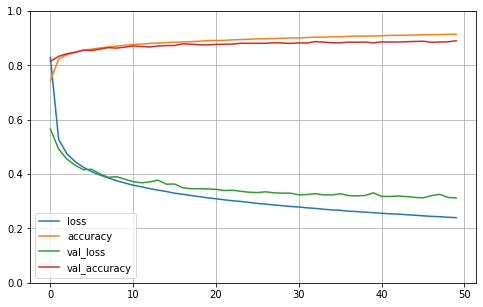

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

class20 = Fashion_MNIST(0.0001, 'Adam', 50, 64, 128, 0.10)
model20 = class20.define_model()
print("training the model")
h20 = class20.train_model(model20)
print("testing the model")
class20.test_model(model20)
pd.DataFrame(h20.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 0.5119 - accuracy: 0.8173 - val_loss: 0.4636 - val_accuracy: 0.8328
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 0.4114 - accuracy: 0.8524 - val_loss: 0.4349 - val_accuracy: 0.8405
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3922 - accuracy: 0.8576 - val_loss: 0.4246 - val_accuracy: 0.8598
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3698 - accuracy: 0.8659 - val_loss: 0.4058 - val_accuracy: 0.8580
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3608 - accuracy: 0.8700 - val_loss: 0.4014 - val_accuracy: 0.8608
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3507 - accuracy: 0.8717 - val_loss: 0.3880 - val_accuracy: 0.8663
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3509 - accuracy: 0.8733 - val_lo

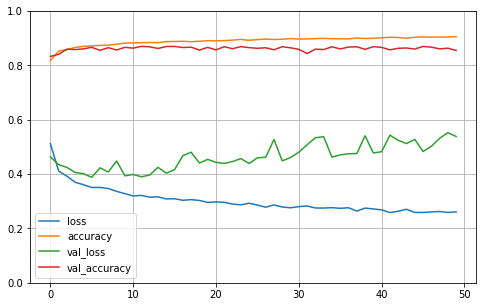

In [68]:
class21 = Fashion_MNIST(0.01, 'Adam', 50, 64, 128, 0.10)
model21 = class21.define_model()
print("training the model")
h21 = class21.train_model(model21)
print("testing the model")
class21.test_model(model21)
pd.DataFrame(h21.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 1.5494 - accuracy: 0.5074 - val_loss: 1.3375 - val_accuracy: 0.4950
Epoch 2/50
844/844 [==============================] - 2s 3ms/step - loss: 1.3217 - accuracy: 0.4938 - val_loss: 1.3365 - val_accuracy: 0.4660
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 1.3192 - accuracy: 0.4907 - val_loss: 1.3277 - val_accuracy: 0.4648
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 1.4791 - accuracy: 0.4689 - val_loss: 1.4838 - val_accuracy: 0.4622
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 1.4122 - accuracy: 0.4680 - val_loss: 1.5395 - val_accuracy: 0.4313
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 1.4294 - accuracy: 0.4308 - val_loss: 1.4624 - val_accuracy: 0.4438
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.4275 - val_lo

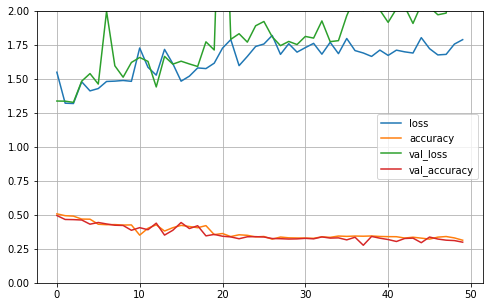

In [70]:
class22 = Fashion_MNIST(0.1, 'Adam', 50, 64, 128, 0.10)
model22 = class22.define_model()
print("training the model")
h22 = class22.train_model(model22)
print("testing the model")
class22.test_model(model22)
pd.DataFrame(h22.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()

using Adam optimizer
training the model
Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.8185 - accuracy: 0.7426 - val_loss: 0.5627 - val_accuracy: 0.8135
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.5239 - accuracy: 0.8254 - val_loss: 0.4857 - val_accuracy: 0.8337
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4684 - accuracy: 0.8419 - val_loss: 0.4484 - val_accuracy: 0.8417
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4387 - accuracy: 0.8508 - val_loss: 0.4259 - val_accuracy: 0.8500
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.4175 - accuracy: 0.8587 - val_loss: 0.4105 - val_accuracy: 0.8547
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8630 - val_loss: 0.4087 - val_accuracy: 0.8552
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3898 - accuracy: 0.8662 - val_lo

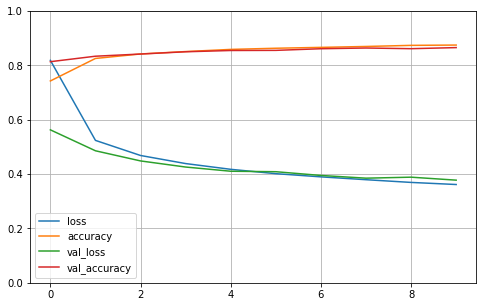

In [74]:
class23 = Fashion_MNIST(0.0001, 'Adam', 10, 64, 128, 0.10)
model23 = class23.define_model()
print("training the model")
h23 = class23.train_model(model23)
print("testing the model")
class23.test_model(model23)
pd.DataFrame(h23.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.3145 - accuracy: 0.6060 - val_loss: 0.8320 - val_accuracy: 0.7432
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 0.7343 - accuracy: 0.7634 - val_loss: 0.6450 - val_accuracy: 0.7875
Epoch 3/50
844/844 [==============================] - 1s 2ms/step - loss: 0.6198 - accuracy: 0.7929 - val_loss: 0.5792 - val_accuracy: 0.8077
Epoch 4/50
844/844 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.8099 - val_loss: 0.5430 - val_accuracy: 0.8197
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.8209 - val_loss: 0.5160 - val_accuracy: 0.8265
Epoch 6/50
844/844 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.8273 - val_loss: 0.5022 - val_accuracy: 0.8242
Epoch 7/50
844/844 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.8326 - val_lo

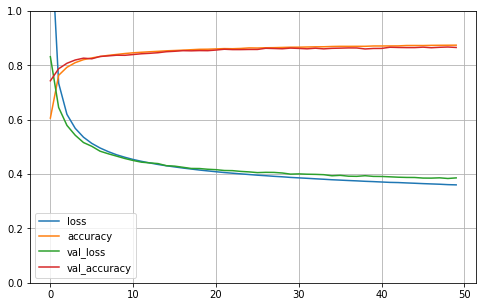

In [75]:
# test the model with different hidden_size (other hyperparameters constant)
class24 = Fashion_MNIST(0.0001, 'Adam', 50, 64, 16, 0.10)
model24 = class24.define_model()
print("training the model")
h24 = class24.train_model(model24)
print("testing the model")
class24.test_model(model24)
pd.DataFrame(h24.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.0473 - accuracy: 0.6582 - val_loss: 0.7049 - val_accuracy: 0.7647
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 0.6471 - accuracy: 0.7862 - val_loss: 0.5861 - val_accuracy: 0.8067
Epoch 3/50
844/844 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.8149 - val_loss: 0.5287 - val_accuracy: 0.8233
Epoch 4/50
844/844 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.8288 - val_loss: 0.4949 - val_accuracy: 0.8328
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.8367 - val_loss: 0.4734 - val_accuracy: 0.8388
Epoch 6/50
844/844 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.8411 - val_loss: 0.4636 - val_accuracy: 0.8370
Epoch 7/50
844/844 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.8454 - val_lo

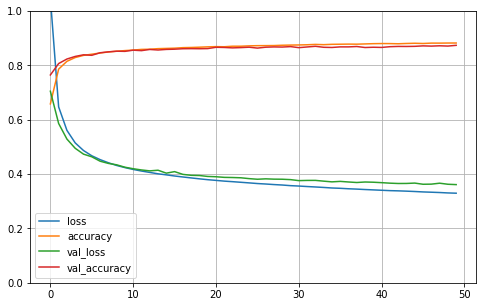

In [76]:
class25 = Fashion_MNIST(0.0001, 'Adam', 50, 64, 32, 0.10)
model25 = class25.define_model()
print("training the model")
h25 = class25.train_model(model25)
print("testing the model")
class25.test_model(model25)
pd.DataFrame(h25.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 0.9241 - accuracy: 0.7104 - val_loss: 0.6201 - val_accuracy: 0.7972
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 0.5695 - accuracy: 0.8134 - val_loss: 0.5243 - val_accuracy: 0.8245
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.5027 - accuracy: 0.8317 - val_loss: 0.4813 - val_accuracy: 0.8353
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.4687 - accuracy: 0.8414 - val_loss: 0.4563 - val_accuracy: 0.8397
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.8492 - val_loss: 0.4406 - val_accuracy: 0.8447
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.4298 - accuracy: 0.8528 - val_loss: 0.4365 - val_accuracy: 0.8462
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.4177 - accuracy: 0.8568 - val_lo

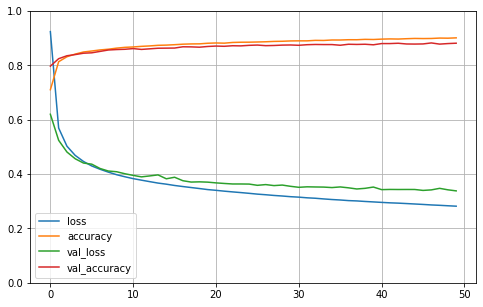

In [77]:
class26 = Fashion_MNIST(0.0001, 'Adam', 50, 64, 64, 0.10)
model26 = class26.define_model()
print("training the model")
h26 = class26.train_model(model26)
print("testing the model")
class26.test_model(model26)
pd.DataFrame(h26.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

using Adam optimizer
training the model
Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3590 - accuracy: 0.8758 - val_loss: 0.3841 - val_accuracy: 0.8658
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8751 - val_loss: 0.3833 - val_accuracy: 0.8678
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3569 - accuracy: 0.8757 - val_loss: 0.3820 - val_accuracy: 0.8668
Epoch 4/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8762 - val_loss: 0.3800 - val_accuracy: 0.8662
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8764 - val_loss: 0.3798 - val_accuracy: 0.8677
Epoch 6/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8764 - val_loss: 0.3850 - val_accuracy: 0.8660
Epoch 7/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8776 - val_lo

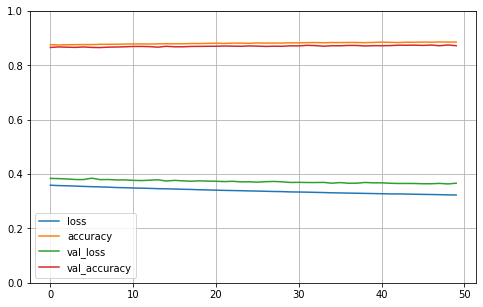

In [78]:
class27 = Fashion_MNIST(0.0001, 'Adam', 50, 64, 128, 0.10)
model27 = class27.define_model()
print("training the model")
h27 = class27.train_model(model24)
print("testing the model")
class27.test_model(model27)
pd.DataFrame(h27.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()